<a href="https://colab.research.google.com/github/MIKBRUNO/TPNS/blob/main/lab1/custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Laptop_price.csv")
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [ ]:
df.shape

(1000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [ ]:
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


<Axes: ylabel='Frequency'>

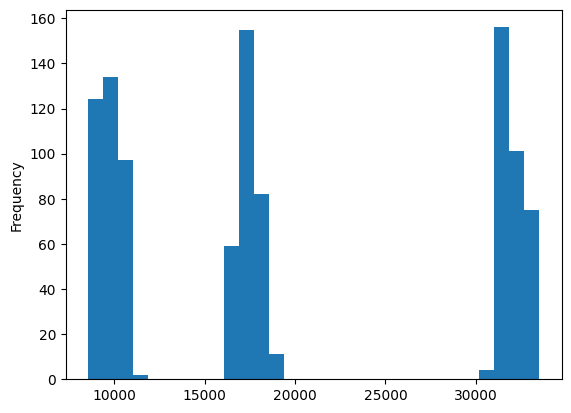

In [ ]:
df["Price"].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

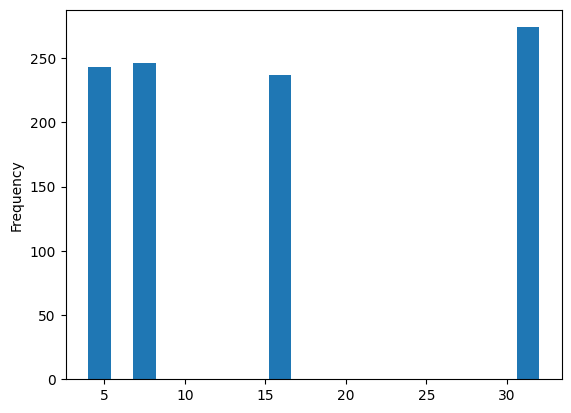

In [ ]:
df["RAM_Size"].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

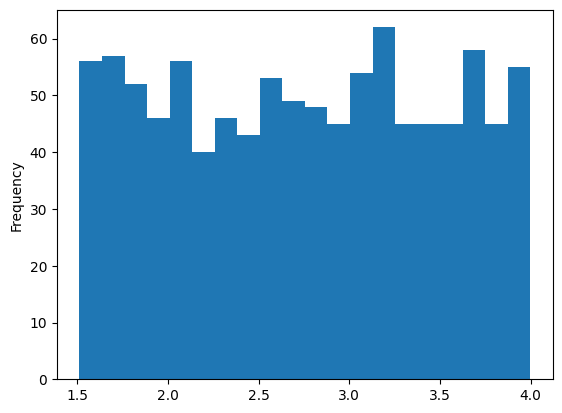

In [ ]:
df["Processor_Speed"].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

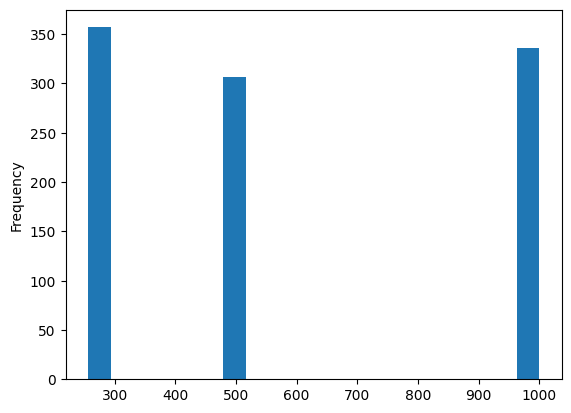

In [ ]:
df["Storage_Capacity"].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

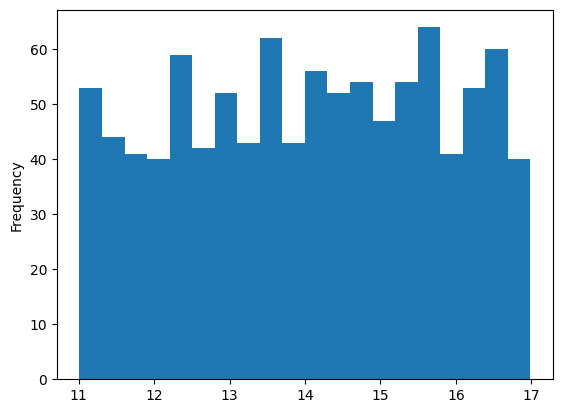

In [ ]:
df["Screen_Size"].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

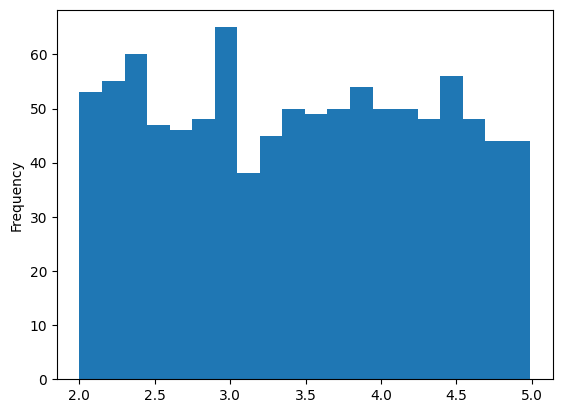

In [ ]:
df["Weight"].plot.hist(bins=20)

# NA and duplicates

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [ ]:
#drop rows with missing data
df.dropna(inplace=True)
df.shape

(1000, 7)

In [ ]:
# drop columns with missing data
df.dropna(axis='columns', thresh=0.9*df.shape[0], inplace=True)
df.shape

(1000, 7)

In [ ]:
df.dtypes

Brand                object
Processor_Speed     float64
RAM_Size              int64
Storage_Capacity      int64
Screen_Size         float64
Weight              float64
Price               float64
dtype: object

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        top = df[col].mode()
        df[col].fillna(top)

In [ ]:
for col in df.columns:
    if df[col].dtype == 'float64':
        med = df[col].median()
        df[col].fillna(med)

# Outliers


<Axes: >

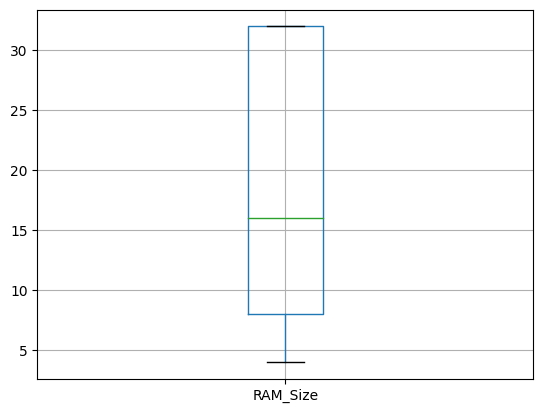

In [ ]:
df.boxplot(column="RAM_Size")

<Axes: >

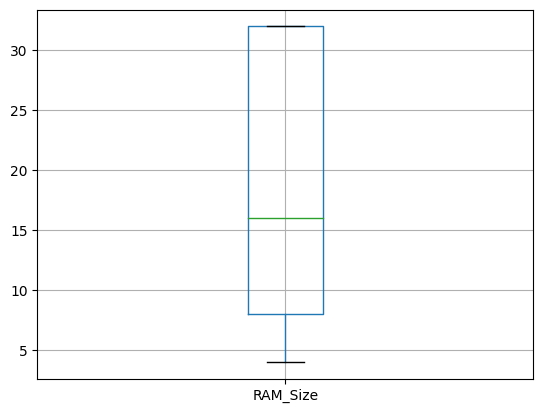

In [ ]:
df.boxplot(column="RAM_Size")

<Axes: >

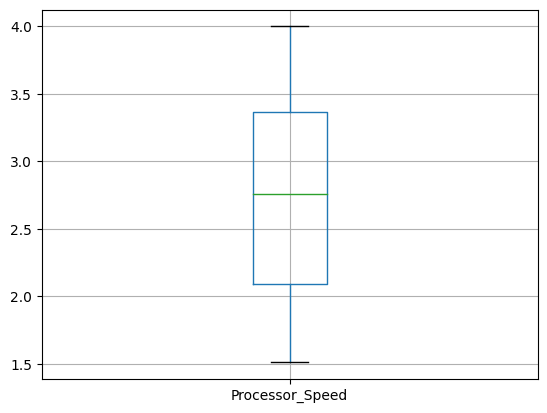

In [ ]:
df.boxplot(column="Processor_Speed")

<Axes: >

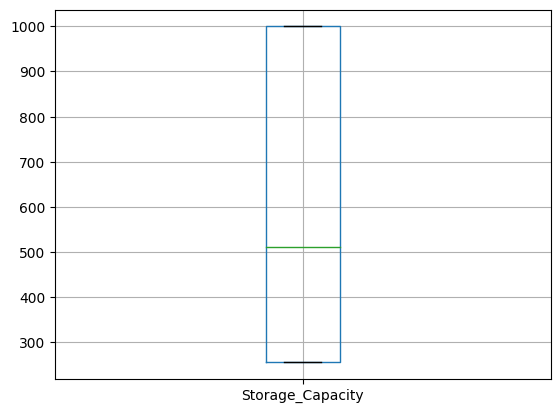

In [ ]:
df.boxplot(column="Storage_Capacity")

<Axes: >

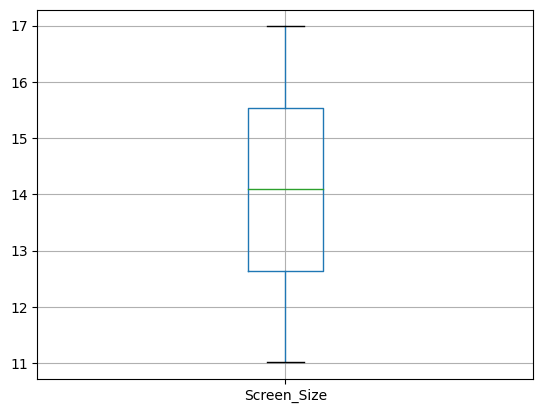

In [ ]:
df.boxplot(column="Screen_Size")

<Axes: >

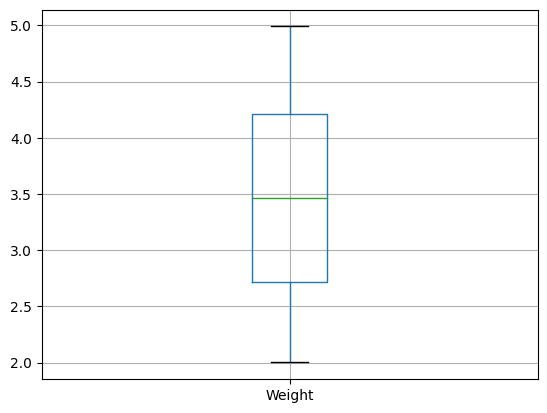

In [ ]:
df.boxplot(column="Weight")

<Axes: >

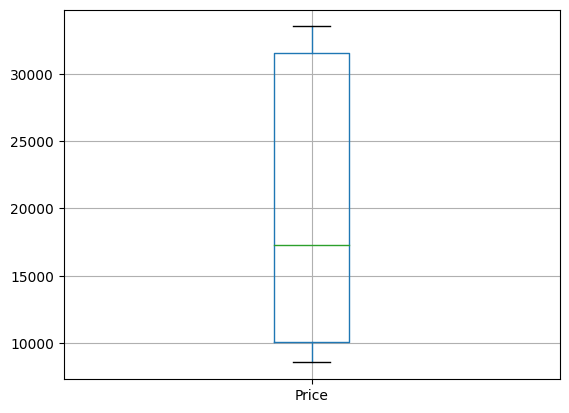

In [ ]:
df.boxplot(column="Price")

# Encode Brands

<Axes: xlabel='Brand'>

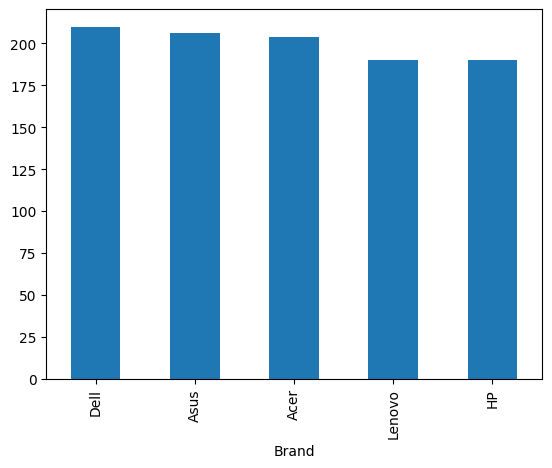

In [ ]:
df["Brand"].value_counts().plot.bar()

In [ ]:
brandsdf = pd.get_dummies(df, columns=["Brand"], drop_first=False)
brandsdf

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,3.830296,16,512,11.185147,2.641094,17395.093065,False,True,False,False,False
1,2.912833,4,1000,11.311372,3.260012,31607.605919,True,False,False,False,False
2,3.241627,4,256,11.853023,2.029061,9291.023542,False,False,False,False,True
3,3.806248,16,512,12.280360,4.573865,17436.728334,True,False,False,False,False
4,3.268097,32,1000,14.990877,4.193472,32917.990718,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,3.343584,4,1000,12.587095,3.162399,31593.668017,False,False,False,True,False
996,2.780555,8,256,12.679356,3.750265,9149.521832,False,False,True,False,False
997,3.200569,4,512,12.666315,3.392612,16552.404779,False,False,True,False,False
998,1.604182,8,256,11.215581,3.857613,9407.473459,False,True,False,False,False


# Correlation Matrix

In [ ]:
mycorr = pd.DataFrame(columns=brandsdf.columns, index=brandsdf.columns, dtype='float64')

In [ ]:
def correlation(feature1: pd.Series, feature2: pd.Series) -> float:
  mean1 = feature1.mean()
  mean2 = feature2.mean()
  n = min(len(feature1), len(feature2))
  cov = sum([(feature1[i] - mean1)*(feature2[i] - mean2) for i in range(n)])/n
  return cov / (feature1.std()*feature2.std())

In [ ]:
for a in brandsdf.columns:
  for b in brandsdf.columns:
    mycorr[a][b] = correlation(brandsdf[a],brandsdf[b])

In [ ]:
mycorr.abs().style.background_gradient(cmap='coolwarm')

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
Processor_Speed,0.999000,0.021370,0.067509,0.013412,0.054549,0.050687,0.013553,0.036757,0.029803,0.028763,0.021792
RAM_Size,0.021370,0.999000,0.002109,0.035966,0.025356,0.061176,0.013995,0.056900,0.057392,0.049385,0.034083
Storage_Capacity,0.067509,0.002109,0.999000,0.027532,0.041294,0.996910,0.019455,0.015275,0.042785,0.009148,0.017839
Screen_Size,0.013412,0.035966,0.027532,0.999000,0.021973,0.026713,0.038077,0.015116,0.013332,0.025213,0.012159
Weight,0.054549,0.025356,0.041294,0.021973,0.999000,0.038378,0.043816,0.022310,0.002611,0.034562,0.009844
Price,0.050687,0.061176,0.996910,0.026713,0.038378,0.999000,0.020465,0.013534,0.040442,0.012065,0.019080
Brand_Acer,0.013553,0.013995,0.019455,0.038077,0.043816,0.020465,0.999000,0.257601,0.260747,0.244939,0.244939
Brand_Asus,0.036757,0.056900,0.015275,0.015116,0.022310,0.013534,0.257601,0.999000,0.262352,0.246447,0.246447
Brand_Dell,0.029803,0.057392,0.042785,0.013332,0.002611,0.040442,0.260747,0.262352,0.999000,0.249457,0.249457
Brand_HP,0.028763,0.049385,0.009148,0.025213,0.034562,0.012065,0.244939,0.246447,0.249457,0.999000,0.234333


# Gain Ratio


In [ ]:
discdf=df.copy()

In [ ]:
for col in discdf.columns:
  print(str(col) + ": " + str(len(discdf[col].unique())))

Brand: 5
Processor_Speed: 1000
RAM_Size: 4
Storage_Capacity: 3
Screen_Size: 1000
Weight: 1000
Price: 1000


In [ ]:
discdf["Price"] = pd.qcut(discdf['Price'], q=5, labels=range(5))
# discdf["Price"] = pd.cut(discdf['Price'], bins=[0, 15000, 25000, 100000], labels=['cheap', 'medium', 'expensive'])

In [ ]:
discdf["RAM_Size"] = discdf["RAM_Size"].astype('category')

In [ ]:
discdf["Storage_Capacity"] = discdf["Storage_Capacity"].astype('category')

In [ ]:
discdf["Brand"] = discdf["Brand"].astype('category')

In [ ]:
for col in df.columns:
  if len(df[col].unique()) <= 5 or col=='Price':
    continue
  discdf[col] = pd.qcut(df[col], q=5, labels=range(5))

In [ ]:
discdf

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,4,16,512,0,1,2
1,Acer,2,4,1000,0,2,3
2,Lenovo,3,4,256,0,0,0
3,Acer,4,16,512,0,4,2
4,Acer,3,32,1000,3,3,4
...,...,...,...,...,...,...,...
995,HP,3,4,1000,1,2,3
996,Dell,2,8,256,1,2,0
997,Dell,3,4,512,1,2,1
998,Asus,0,8,256,0,3,0


In [ ]:
from math import log2
def entropy(feature: pd.Series) -> float:
  classes = feature.value_counts()
  count = len(feature)
  probability = [class_count / count for class_count in classes if not (class_count / count) < 0.001]

  return sum([-p * log2(p) for p in probability])

In [ ]:
def information_gain(data: pd.DataFrame, target: str, feature: str) -> float:
  gain = entropy(data[target])
  for unique in data[feature].unique():
    subset = data[data[feature] == unique][target]
    gain -= entropy(subset) * (len(subset)/len(data[target]))
  return gain

In [ ]:
from math import log2
def gain_ratio(data: pd.DataFrame, target: str, feature: str) -> float:
  intr_info = 0
  for unique in data[feature].unique():
    subset = data[data[feature] == unique][target]
    weight = len(subset) / len(data[target])
    intr_info -= weight * log2(weight)
  return information_gain(data, target, feature) / intr_info

In [ ]:
for col in discdf.columns:
  if col != 'Price':
    print(f"{col}: {information_gain(discdf, 'Price', col)}")

Brand: 0.015218461682953821
Processor_Speed: 0.019532259303781385
RAM_Size: 0.2916391263248542
Storage_Capacity: 1.2511582713497218
Screen_Size: 0.013366370106225156
Weight: 0.007156798006832277


In [ ]:
for col in discdf.columns:
  if col != 'Price':
    print(f"{col}: {gain_ratio(discdf, 'Price', col)}")

Brand: 0.006557833930691421
Processor_Speed: 0.008412086208349576
RAM_Size: 0.14598720484993274
Storage_Capacity: 0.7907607748299078
Screen_Size: 0.005756582271284143
Weight: 0.003082265132409045
